In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from bokeh.io import output_notebook
output_notebook()
from bokeh.layouts import row, column, widgetbox
from bokeh.plotting import figure, output_notebook, output_file, show
from bokeh.models.sources import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.models import OpenURL, TapTool, CustomJS, Slider, Range1d, DatetimeTickFormatter
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from bokeh.charts import Histogram, Bar

import ml_insights as mli

Loading BokehJS ...

In [85]:
df = pd.read_csv('hypers.csv', index_col=0)
df['link'] = df.apply(lambda mo:'http://134.158.75.73:24000/pattern/out_of_class_figs.*{}.*'.format(mo['id']), axis=1)

model_names = [
    'model64', 
    'model101', 
    'model88', 
    'model55', 
    'gan']
output_cols = [
    'out_objectness', 
    'out_count', 
    'out_max',
    'in_objectness', 
    'in_count', 
    'in_max'
]
input_cols = list(set(df.columns) - set(output_cols))

# I you want to study a specific type of model, put its name
# in the variable 'model_name'. it should be a str among the 
# list 'model_names', which is defined above. Otherwise, if
# you want to study all the type of models at the same, set 
#'model_name' to None.
# model_name = 'model64'
# if model_name:
#     df = df[df['model_name'] == model_name]
#     df = df.dropna(axis=0, subset=output_cols)
#     df = df.dropna(axis=1)

In [80]:
output_file('/var/www/models.html')

In [81]:
#royalblue, coral, seagreen, indianred, goldenrod, black, palevioletred

In [82]:
df['line_color'] = 'royalblue'
df['line_color'][df['model_name'] == 'model55'] = 'coral'
df['line_color'][df['model_name'] == 'model88'] = 'seagreen'
df['line_color'][df['model_name'] == 'model64'] = 'goldenrod'
df['line_color'][df['model_name'] == 'model101'] = 'palevioletred'
df['model_desc'] = 'gan'
df['model_desc'][df['model_name'] == 'model55'] = 'sparse conv'
df['model_desc'][df['model_name'] == 'model88'] = 'brushstroke'
df['model_desc'][df['model_name'] == 'model64'] = 'sparse fully connected'
df['model_desc'][df['model_name'] == 'model101'] = 'multi-scale sparse conv'

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ubuntu/minico

In [83]:
hover = HoverTool(
        tooltips=[
            ("model", "@model_desc"),
        ]
    )

tools = [hover, 'pan,wheel_zoom,box_zoom,reset,previewsave,tap']
p = figure(
    plot_width=900, plot_height=900, tools=tools, title='',
)

p.circle(
    'out_objectness', 'out_count', size=10, line_color='line_color', fill_color='line_color',
    fill_alpha=0.9, line_width=1, source=ColumnDataSource(df), legend='model_desc'
)

p.xaxis.axis_label = 'out objectness'
p.yaxis.axis_label = 'out count'
p.xaxis.axis_label_text_font_size = '14pt'
p.yaxis.axis_label_text_font_size = '14pt'
p.legend.label_text_font_size = '14pt'
p.title.text_font_size = '16pt'
p.xaxis.major_label_text_font_size = '10pt'

url = "@link"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)

show(p)

FileNotFoundError: [Errno 2] No such file or directory: '/var/www/models.html'

In [73]:
df.sort_values(by='out_objectness', ascending=False)

autoencoding_loss  binarize_thresh  budget_hours      color  color_0  \
1188     squared_error              0.5           6.0        NaN      NaN   
639      squared_error              NaN           6.0  predicted      NaN   
936      squared_error              0.5           6.0        NaN      NaN   
635      squared_error              NaN           2.0        NaN      NaN   
1119     squared_error              0.5           2.0        NaN      NaN   
797      squared_error              NaN           6.0        NaN      NaN   
735      squared_error              NaN           2.0        NaN      NaN   
310      squared_error              NaN           6.0        NaN      NaN   
884      squared_error              NaN           6.0        NaN      1.0   
1052     squared_error              NaN           6.0        NaN      NaN   
512      squared_error              NaN           6.0        NaN      NaN   
990      squared_error              NaN           6.0        NaN      NaN   
806      squared_error              NaN           2.0        NaN      NaN   
411      squared_error              0.5           2.0        NaN      NaN   
758      squared_error              NaN           2.0        NaN      NaN   
799      squared_error              NaN           2.0        NaN      NaN   
589      squared_error              NaN           6.0        NaN      1.0   
88       squared_error              NaN           2.0        NaN      NaN   
913      squared_error              0.5           2.0        NaN      NaN   
105      squared_error              NaN           2.0        NaN      NaN   
208      squared_error              NaN           6.0  predicted      NaN   
973      squared_error              NaN           2.0        NaN      NaN   
909      squared_error              0.5           6.0        NaN      NaN   
1016     squared_error              NaN           6.0        NaN      NaN   
836      squared_error              NaN           6.0        NaN      NaN   
425      squared_error              NaN           6.0        NaN      1.0   
225      squared_error              0.5           2.0        NaN      NaN   
292      squared_error              NaN           6.0  predicted      NaN   
674      squared_error              0.5           2.0        NaN      NaN   
892      squared_error              NaN           6.0  predicted      NaN   
1374               NaN              NaN           2.0        NaN      NaN   
59       squared_error              NaN           6.0  predicted      NaN   
527      squared_error              NaN           2.0        NaN      NaN   
365      squared_error              NaN           2.0        NaN      NaN   
1199     squared_error              NaN           6.0        NaN      NaN   
775      squared_error              NaN           2.0        NaN      NaN   
601      squared_error              NaN           6.0        NaN      NaN   
179      squared_error              NaN           2.0        NaN      NaN   
1410               NaN              NaN           2.0        NaN      NaN   
714      squared_error              NaN           6.0        NaN      NaN   
316      squared_error              NaN           2.0        NaN      NaN   
699      squared_error              NaN           2.0        NaN      NaN   
1057     squared_error              0.5           6.0        NaN      NaN   
754      squared_error              0.5           2.0        NaN      NaN   
649      squared_error              NaN           2.0        NaN      NaN   
803      squared_error              0.5           2.0        NaN      NaN   
651      squared_error              NaN           2.0        NaN      NaN   
443      squared_error              NaN           2.0        NaN      NaN   
744      squared_error              0.5           2.0        NaN      NaN   
529      squared_error              NaN           6.0        NaN      1.0   
885      squared_error              NaN           6.0  predicted      NaN   
6

## Feature importances

In [86]:
data = df.dropna(subset=output_cols, axis=0)
# shuffling data
ind = np.arange(len(data))
np.random.shuffle(ind)
data = data.iloc[ind]
data.head()

autoencoding_loss  binarize_thresh  budget_hours      color  color_0  \
650      squared_error              NaN           2.0        NaN      NaN   
199      squared_error              NaN           6.0  predicted      NaN   
256      squared_error              NaN           6.0        NaN      NaN   
167      squared_error              NaN           2.0        NaN      NaN   
1082     squared_error              NaN           6.0        NaN      NaN   

     contractive  contractive_coef dataset   denoise  eps  filter_size  \
650        False               NaN  digits  0.287879  NaN          NaN   
199        False               NaN  digits       NaN  0.0          NaN   
256        False               NaN  digits       NaN  NaN          5.0   
167         True         63.545151  digits  0.010101  NaN          NaN   
1082       False               NaN  digits       NaN  NaN          5.0   

                                    id   k  k_0  k_1  k_2  k_3  k_4  l2  lr  \
650   9704f27667073a070219321afe2eec25 NaN  NaN  NaN  NaN  NaN  NaN NaN NaN   
199   a90240e3767bfe823c450999377b7c56 NaN  NaN  NaN  NaN  NaN  NaN NaN NaN   
256   c6af8876f3050fa70528108b4f706cd8 NaN  NaN  NaN  NaN  NaN  NaN NaN NaN   
167   afd05e48f1743956154225c6953d02a7 NaN  NaN  NaN  NaN  NaN  NaN NaN NaN   
1082  dd68ccbea4f532a00be3c185c466d63c NaN  4.0  1.0  NaN  NaN  NaN NaN NaN   

     marginalized  max_nb_epochs merge_op    mode model_name  n_steps  \
650         False            NaN      NaN     NaN    model64      NaN   
199         False   1.000000e+10      NaN  random    model88     53.0   
256         False            NaN      NaN     NaN    model55      NaN   
167         False            NaN      NaN     NaN    model64      NaN   
1082        False            NaN      mul  random   model101      NaN   

      nb_fc_layers  nb_fc_units_0  nb_fc_units_1  nb_fc_units_2  \
650            NaN            NaN            NaN            NaN   
199            1.0         1400.0            NaN            NaN   
256            NaN            NaN            NaN            NaN   
167            NaN            NaN            NaN            NaN   
1082           NaN            NaN            NaN            NaN   

      nb_fc_units_3  nb_filters_0  nb_filters_1  nb_filters_2  nb_filters_3  \
650             NaN           NaN           NaN           NaN           NaN   
199             NaN           NaN           NaN           NaN           NaN   
256             NaN         512.0          16.0          32.0         128.0   
167             NaN           NaN           NaN           NaN           NaN   
1082            NaN         128.0         512.0           NaN           NaN   

      nb_filters_4  nb_filters_mul  nb_hidden_units_0  nb_hidden_units_1  \
650            NaN             NaN              400.0              400.0   
199            NaN             NaN                NaN                NaN   
256          256.0             1.0                NaN                NaN   
167            NaN             NaN              300.0                NaN   
1082           NaN             NaN                NaN                NaN   

      nb_hidden_units_2  nb_hidden_units_3  nb_hidden_units_4  nb_layers  \
650               400.0              500.0              800.0        5.0   
199                 NaN                NaN                NaN        NaN   
256                 NaN                NaN                NaN        5.0   
167                 NaN                NaN                NaN        1.0   
1082                NaN                NaN                NaN        2.0   

      nb_recurrent_layers  nb_recurrent_units_0  nb_recurrent_units_1  \
650                   NaN                   NaN                   NaN   
199                   1.0                 300.0                   NaN   
256                   NaN                   NaN                   NaN   
167                   NaN                   NaN                   NaN   
1082                  NaN 

In [87]:
x = data.drop(output_cols, axis=1)
x = pd.get_dummies(x)
x = x.fillna(-1)
y = data['out_objectness'] + 20 * data['out_count']

param_dist = {"max_depth": sp_randint(10, 100),
              "max_features": sp_randint(1, 10),
              "n_estimators": sp_randint(10, 100)}
n_iter_search = 30
reg = RandomizedSearchCV(
    RandomForestRegressor(), 
    n_jobs=-1,
    param_distributions=param_dist, 
    n_iter=n_iter_search, 
    scoring=make_scorer(r2_score),
    refit=True,
    cv=KFold(5).get_n_splits())
reg.fit(x, y)
print(reg.best_params_)
print(reg.best_score_)
best_reg = reg.best_estimator_

{'max_features': 7, 'max_depth': 99, 'n_estimators': 82}
0.326283849757


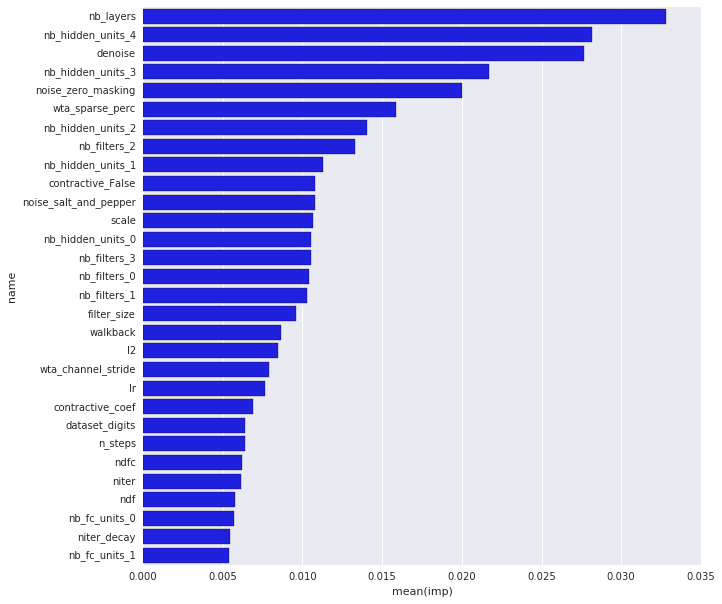

In [88]:
df = pd.DataFrame({'name': x.columns, 'imp': best_reg.feature_importances_})
df = df.sort_values(by='imp', ascending=False)
df = df.iloc[0:30]
fig = plt.figure(figsize=(10, 10))
sns.barplot(x='imp', y='name', data=df, color='blue', orient='h')
plt.show()

In [89]:
## ML insights is a package to understand supervised models
# check <https://github.com/numeristical/introspective> for more info
# e.g https://github.com/numeristical/introspective/blob/master/examples/Ames_Housing_Analysis.ipynb

In [95]:
mxr = mli.ModelXRay(best_reg, x.iloc[0:10])

KeyboardInterrupt: 

In [ ]:
mxr.feature_effect_summary?

In [ ]:
mxr.feature_effect_summary()

In [92]:
mxr.feature_dependence_plots?

array([234, 134, 277,  66, 552])

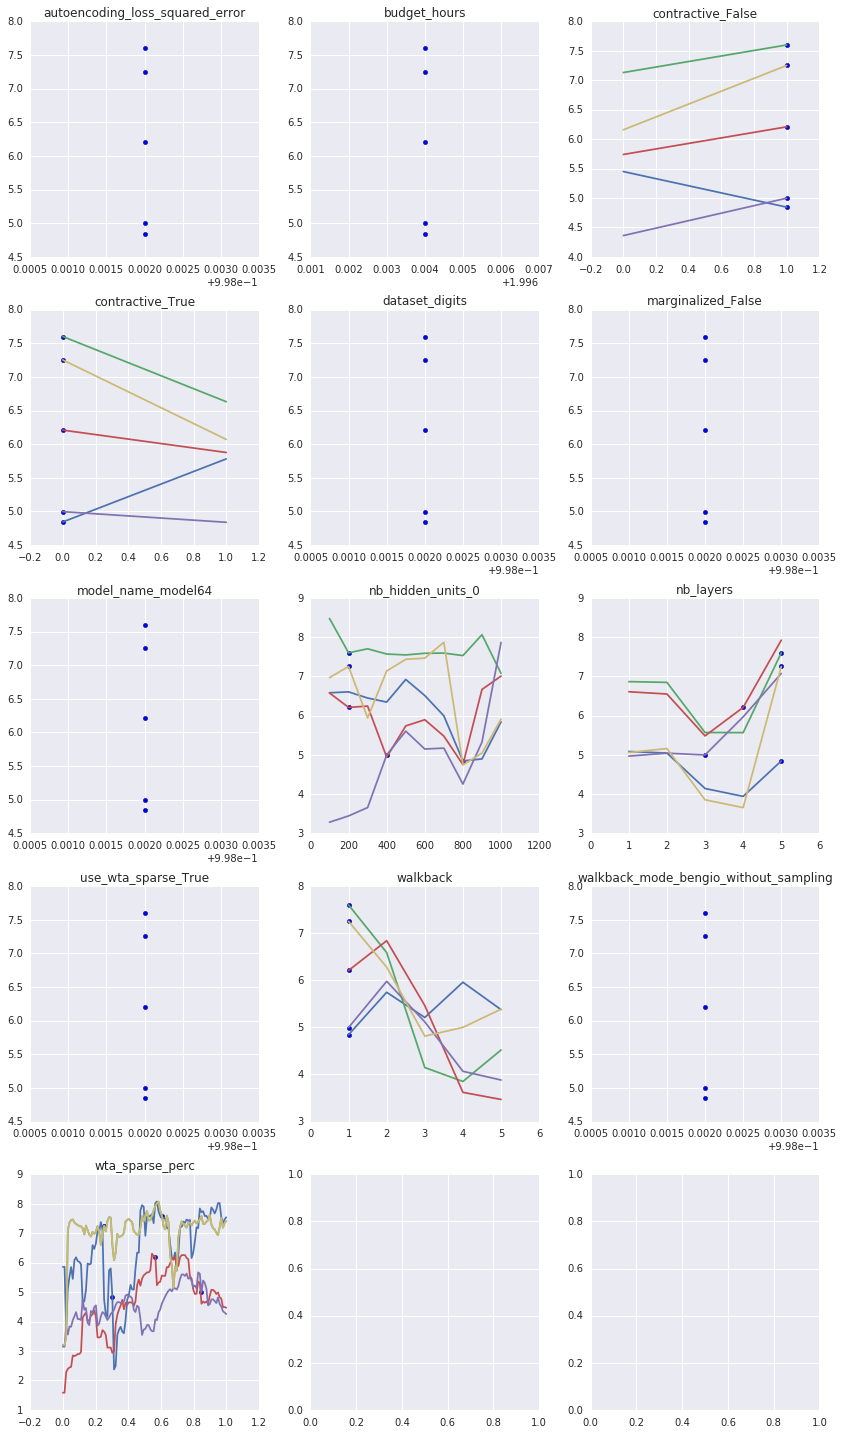

In [17]:
mxr.feature_dependence_plots(num_pts=5)